In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-company-reviews-dataset-cleaned/final_sg_companies_reviews_clean.csv
/kaggle/input/raw-final-evaluation-data/evaluation_data_raw_final.csv
/kaggle/input/final-evaluation-data-for-company-reviews/final_evaluation_data.csv
/kaggle/input/companies-reviews-unprocessed/sg_companies_reviews.csv
/kaggle/input/results-from-bert/glassdoor_data_distilbert_finetuned.csv
/kaggle/input/results-from-bert/validation_results.csv


In [2]:
!pip install pyabsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 10.7 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=e1b5bb0875bf720c103f9518011d9bcc5a9c57f58659cd57bfd9b31a49ce0798
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolve

### Import Data

In [3]:
company_reviews = pd.read_csv('/kaggle/input/results-from-bert/validation_results.csv')
company_reviews.head()

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,Overall Review with Title,Sentiment,True_Labels,Predicted_Labels
0,ServiceNow,5,31/1/2024,best company i have ever worked at,advisory solution consultant,current employee more than 1 year,"Washington, DC",work life balance incredible growth customer c...,not necessarily a con but employees are highly...,work life balance incredible growth customer c...,best company i have ever worked at // work lif...,Positive,1,1
1,IBM,5,2/10/2023,fantastic place to work even after all these y...,business manager,current employee more than 3 years,Calcutta,ibm provides unmatched learning opportunity in...,well no it does not give you > 10 hike year on...,ibm provides unmatched learning opportunity in...,fantastic place to work even after all these y...,Positive,1,0
2,Deliveroo,5,15/1/2024,great place to work,sales manager,former employee more than 1 year,"London, England",awesome products and teams to work with,really nothing i can think of,awesome products and teams to work with really...,great place to work // awesome products and te...,Positive,1,1
3,Booking.com,5,5/9/2023,great culture people worklife balance and comp...,engineering manager,current employee less than 1 year,Amsterdam,the company gives a good compensation package ...,monthly healthcare insurance premium is not pa...,the company gives a good compensation package ...,great culture people worklife balance and comp...,Positive,1,1
4,Hitachi,5,18/9/2023,employee,anonymous employee,current employee more than 5 years,"California, MD",amazing company to work with,no bad all good company,amazing company to work with no bad all good c...,employee // amazing company to work with no ba...,Positive,1,1


In [4]:
len(company_reviews)

1724

In [5]:
len(company_reviews)

1724

In [6]:
# Find duplicates
duplicates = company_reviews[company_reviews.duplicated()]

duplicates

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,Overall Review with Title,Sentiment,True_Labels,Predicted_Labels
1136,Virtusa,1,27/7/2023,not a workplace for women,employee,current employee,"Piscataway, NJ",there is certainly nothing,there is a noticeable presence of office polit...,there is certainly nothing there is a noticeab...,not a workplace for women // there is certainl...,Negative,0,0
1137,NEC Corporation,1,30/7/2021,no work life balance,project coordinator,current employee more than 1 year,"Irving, TX",pay is within the market range of what you exp...,forced overtime amounting to 5060 hours a week...,pay is within the market range of what you exp...,no work life balance // pay is within the mark...,Negative,0,0
1141,Atos,1,29/10/2022,poor leadership,soc analyst,current employee less than 1 year,"Reston, VA",there are many different programs to support t...,leadership values liars over honest workers no...,there are many different programs to support t...,poor leadership // there are many different pr...,Negative,0,0
1143,Intel Corporation,1,3/2/2024,technical teams underpaid while sales goes on ...,process engineer,current employee more than 10 years,"Chandler, AZ",incredibly passionate and talented coworkers t...,pay will likely be significantly lower than eq...,incredibly passionate and talented coworkers t...,technical teams underpaid while sales goes on ...,Negative,0,0
1145,Shopee,1,8/2/2023,terrible company,business development associate,former employee more than 1 year,"Poland, ME",salary and benefits nothing else to add,management overtime no dvelopement opportunities,salary and benefits nothing else to add manage...,terrible company // salary and benefits nothin...,Negative,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Capgemini,5,20/12/2023,good company to work for,manager,current employee,"Charlotte, NC",good company to work for,low compensation but good projects,good company to work for low compensation but ...,good company to work for // good company to wo...,Positive,1,1
1671,Garena,5,19/12/2023,management associate,management associate,former employee,Bangkok,challenging and fun with good people,nothing if you are hardworking person,challenging and fun with good people nothing i...,management associate // challenging and fun wi...,Positive,1,1
1699,Garena,5,22/2/2023,good for development,social media specialist,current employee more than 3 years,Jakarta,good bonus and increament every year,work hour too busy as shared ops,good bonus and increament every year work hour...,good for development // good bonus and incream...,Positive,1,1
1709,NTT DATA,5,23/1/2024,federal,senior architect,former employee more than 3 years,"Herndon, VA",great leadership and culture that allows you t...,would like to have collaborated more with the ...,great leadership and culture that allows you t...,federal // great leadership and culture that a...,Positive,1,1


In [7]:
duplicates

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,Overall Review with Title,Sentiment,True_Labels,Predicted_Labels
1136,Virtusa,1,27/7/2023,not a workplace for women,employee,current employee,"Piscataway, NJ",there is certainly nothing,there is a noticeable presence of office polit...,there is certainly nothing there is a noticeab...,not a workplace for women // there is certainl...,Negative,0,0
1137,NEC Corporation,1,30/7/2021,no work life balance,project coordinator,current employee more than 1 year,"Irving, TX",pay is within the market range of what you exp...,forced overtime amounting to 5060 hours a week...,pay is within the market range of what you exp...,no work life balance // pay is within the mark...,Negative,0,0
1141,Atos,1,29/10/2022,poor leadership,soc analyst,current employee less than 1 year,"Reston, VA",there are many different programs to support t...,leadership values liars over honest workers no...,there are many different programs to support t...,poor leadership // there are many different pr...,Negative,0,0
1143,Intel Corporation,1,3/2/2024,technical teams underpaid while sales goes on ...,process engineer,current employee more than 10 years,"Chandler, AZ",incredibly passionate and talented coworkers t...,pay will likely be significantly lower than eq...,incredibly passionate and talented coworkers t...,technical teams underpaid while sales goes on ...,Negative,0,0
1145,Shopee,1,8/2/2023,terrible company,business development associate,former employee more than 1 year,"Poland, ME",salary and benefits nothing else to add,management overtime no dvelopement opportunities,salary and benefits nothing else to add manage...,terrible company // salary and benefits nothin...,Negative,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Capgemini,5,20/12/2023,good company to work for,manager,current employee,"Charlotte, NC",good company to work for,low compensation but good projects,good company to work for low compensation but ...,good company to work for // good company to wo...,Positive,1,1
1671,Garena,5,19/12/2023,management associate,management associate,former employee,Bangkok,challenging and fun with good people,nothing if you are hardworking person,challenging and fun with good people nothing i...,management associate // challenging and fun wi...,Positive,1,1
1699,Garena,5,22/2/2023,good for development,social media specialist,current employee more than 3 years,Jakarta,good bonus and increament every year,work hour too busy as shared ops,good bonus and increament every year work hour...,good for development // good bonus and incream...,Positive,1,1
1709,NTT DATA,5,23/1/2024,federal,senior architect,former employee more than 3 years,"Herndon, VA",great leadership and culture that allows you t...,would like to have collaborated more with the ...,great leadership and culture that allows you t...,federal // great leadership and culture that a...,Positive,1,1


In [8]:
company_reviews

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,Overall Review with Title,Sentiment,True_Labels,Predicted_Labels
0,ServiceNow,5,31/1/2024,best company i have ever worked at,advisory solution consultant,current employee more than 1 year,"Washington, DC",work life balance incredible growth customer c...,not necessarily a con but employees are highly...,work life balance incredible growth customer c...,best company i have ever worked at // work lif...,Positive,1,1
1,IBM,5,2/10/2023,fantastic place to work even after all these y...,business manager,current employee more than 3 years,Calcutta,ibm provides unmatched learning opportunity in...,well no it does not give you > 10 hike year on...,ibm provides unmatched learning opportunity in...,fantastic place to work even after all these y...,Positive,1,0
2,Deliveroo,5,15/1/2024,great place to work,sales manager,former employee more than 1 year,"London, England",awesome products and teams to work with,really nothing i can think of,awesome products and teams to work with really...,great place to work // awesome products and te...,Positive,1,1
3,Booking.com,5,5/9/2023,great culture people worklife balance and comp...,engineering manager,current employee less than 1 year,Amsterdam,the company gives a good compensation package ...,monthly healthcare insurance premium is not pa...,the company gives a good compensation package ...,great culture people worklife balance and comp...,Positive,1,1
4,Hitachi,5,18/9/2023,employee,anonymous employee,current employee more than 5 years,"California, MD",amazing company to work with,no bad all good company,amazing company to work with no bad all good c...,employee // amazing company to work with no ba...,Positive,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,Keywords Studios,5,19/12/2022,best place to be,player support representative,current employee more than 5 years,"Manila, Dallas, AL",this might sound bias since im still in the co...,none that i could think of at the moment,this might sound bias since im still in the co...,best place to be // this might sound bias sinc...,Positive,1,0
1720,Palo Alto Networks,5,19/9/2023,great place,staff software engineer,current employee,"Santa Clara, CA",great wlb and interesting work,depending on the team culture can vary,great wlb and interesting work depending on th...,great place // great wlb and interesting work ...,Positive,1,1
1721,Rohde & Schwarz,5,1/4/2021,great place to work,manager mobile network test,current employee more than 3 years,"Dallas, TX",great place to work great culture and benefits,no downsides to working at rs,great place to work great culture and benefits...,great place to work // great place to work gre...,Positive,1,1
1722,eBay,5,22/2/2024,good company to work with,customer service representative csr,former employee more than 1 year,"Tampa, FL",nice people service can be a bit troubling,polices are taking a turn for the worse,nice people service can be a bit troubling pol...,good company to work with // nice people servi...,Positive,1,1


In [9]:
company_reviews.iloc[1]['Overall Review with Title']

'fantastic place to work even after all these years // ibm provides unmatched learning opportunity in terms of collaboration with partners and inhouse learning content also it still retains amazing flexibility and work life balance also the culture of treating even the junior most resource with respect is still there like old days overall it will score high on most of these areas after so many changes it has gone through it managed to retain most of the core values intact also the pay structure is quite simplified no variable for most band 9 in delivery roles well no it does not give you > 10 hike year on year not sure which it company gives that nowadays also ibm can be tricky for people who are used to be told what to do in terms of day to day work and also overall career this is something even i found a bit obstructing at first then my manager told that ibm is like a buffet you have to figure out what you want and pick it up yourself this is something one might find unsettling speci

In [10]:
len(company_reviews['Company Name'].unique())

198

In [11]:
company_reviews['Company Name'].unique()

array(['ServiceNow', 'IBM', 'Deliveroo', 'Booking.com', 'Hitachi',
       'Thomson Reuters', 'Motorola Solutions', 'EPAM Systems', 'Indeed',
       'NTT DATA', 'Seagate Technology', 'X', 'NielsenIQ', 'Nielsen',
       'Microsoft', 'Garena', 'AMD', 'Thoughtworks', 'VMware', 'Airbnb',
       'NCR', 'Yahoo', 'Adobe', 'Micron Technology', 'Gojek', 'Red Hat',
       'HubSpot', 'Genpact', 'Shopee', 'NEC Corporation', 'UST', 'PayPal',
       'Lenovo', 'Autodesk', 'Concentrix', 'SAP',
       'Hewlett Packard Enterprise | HPE', 'Rakuten', 'Oracle', 'Equinix',
       'Ingram Micro', 'Xilinx', 'Luxoft', 'Tencent', 'foodpanda',
       'HP Inc.', 'Marvell Technology', 'Visa Inc.', 'Zendesk', 'CSC',
       'Qualcomm', 'NTT Ltd.', 'Bloomberg', 'Workday', 'SAS', 'Ricoh',
       'Agoda', 'Grab', 'LinkedIn', 'Intel Corporation', 'Netflix',
       'Virtusa', 'Avanade', 'Cognizant Technology Solutions', 'Apple',
       'Amadeus', 'Capgemini', 'Cisco Systems', 'Infosys', 'Wipro',
       'Western Digital', 

### 1. Preprocess + extract aspects from subset of Company Review dataset

In [12]:
import time

In [13]:
#from pyabsa.framework.dataset_class import detect_infer_dataset, detect_dataset
from pyabsa.utils import make_ABSA_dataset

company_reviews = company_reviews.drop_duplicates()
#company_reviews['num_words'] = company_reviews.apply(lambda x: len(x['Review'].split(" ")), axis=1)
#company_reviews = company_reviews.loc[company_reviews['num_words']>5]

#company_reviews = company_reviews.reset_index(drop=True)
#company_reviews = company_reviews.drop(columns=['num_words'])

company_reviews_only = company_reviews[['Overall Review with Title']]
company_reviews_only.to_csv('preprocessed_company_review_data', index=False, header=False)
start_time = time.time()
company_review_dataset = make_ABSA_dataset(dataset_name_or_path='preprocessed_company_review_data', checkpoint='english')
end_time = time.time()
# company_reviews_only = company_reviews[['Review_cleaned']]
# company_reviews_only.to_csv('preprocessed_company_review_data.inference', index=False, header=False)
# company_review_dataset = make_ABSA_dataset('preprocessed_company_review_data.inference')

[2024-04-11 13:41:50] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






2024-04-11 13:41:51.945800: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 13:41:51.945922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 13:41:52.095422: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


[2024-04-11 13:42:11] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-04-11 13:42:11] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-04-11 13:42:11] (2.4.1.post1) Downloading checkpoint:english 
[2024-04-11 13:42:11] (2.4.1.post1) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


Find zipped checkpoint: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip, unzipping


Done.
[2024-04-11 13:42:18] (2.4.1.post1) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip 
[2024-04-11 13:42:18] (2.4.1.post1) Load aspect extractor from checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2024-04-11 13:42:18] (2.4.1.post1) config: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.config
[2024-04-11 13:42:18] (2.4.1.post1) state_dict: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.state_dict
[2024-04-11 13:42:18] (2.4.1.post1) model: None
[2024-04-11 13:42:18] (2.4.1.post1) tokenizer: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.tokenizer
[2024-04-11 1

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


[2024-04-11 13:42:24] (2.4.1.post1) Start processing dataset: preprocessed_company_review_data


preparing apc inference dataloader: 100%|██████████| 2091/2091 [00:09<00:00, 229.67it/s]
/opt/conda/lib/python3.10/site-packages/pyabsa/tasks/AspectTermExtraction/prediction/aspect_extractor.py:593: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:261.)
  lcf_cdm_vec = torch.tensor(
classifying aspect sentiments: 100%|██████████| 66/66 [00:43<00:00,  1.52it/s]


[2024-04-11 13:44:00] (2.4.1.post1) The results of aspect term extraction have been saved in /kaggle/working/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-11 13:44:00] (2.4.1.post1) Example 0: best company i have ever worked at / / work life balance incredible growth <customer:Positive Confidence:0.989> centric creed is to be hungry and humble not necessarily a con but <employees:Neutral Confidence:0.8229> are highly accomplished and driven cant think of any real con
[2024-04-11 13:44:00] (2.4.1.post1) Example 1: fantastic place to work even after all these years / / ibm provides unmatched learning opportunity in terms of collaboration with partners and <inhouse learning:Positive Confidence:0.9991> content also it still retains amazing flexibility and work life balance also the <culture:Positive Confidence:0.9984> of treating even the junior most resource with respect is still there like old days overall it will score high on most of these areas

In [14]:
print("Time take to extract and classify aspects is",str(end_time-start_time))

Time take to extract and classify aspects is 110.10364365577698


In [15]:
company_reviews_only

,Overall Review with Title
0,best company i have ever worked at // work lif...
1,fantastic place to work even after all these y...
2,great place to work // awesome products and te...
3,great culture people worklife balance and comp...
4,employee // amazing company to work with no ba...
...,...
1719,best place to be // this might sound bias sinc...
1720,great place // great wlb and interesting work ...
1721,great place to work // great place to work gre...
1722,good company to work with // nice people servi...


In [16]:
company_reviews

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,Overall Review with Title,Sentiment,True_Labels,Predicted_Labels
0,ServiceNow,5,31/1/2024,best company i have ever worked at,advisory solution consultant,current employee more than 1 year,"Washington, DC",work life balance incredible growth customer c...,not necessarily a con but employees are highly...,work life balance incredible growth customer c...,best company i have ever worked at // work lif...,Positive,1,1
1,IBM,5,2/10/2023,fantastic place to work even after all these y...,business manager,current employee more than 3 years,Calcutta,ibm provides unmatched learning opportunity in...,well no it does not give you > 10 hike year on...,ibm provides unmatched learning opportunity in...,fantastic place to work even after all these y...,Positive,1,0
2,Deliveroo,5,15/1/2024,great place to work,sales manager,former employee more than 1 year,"London, England",awesome products and teams to work with,really nothing i can think of,awesome products and teams to work with really...,great place to work // awesome products and te...,Positive,1,1
3,Booking.com,5,5/9/2023,great culture people worklife balance and comp...,engineering manager,current employee less than 1 year,Amsterdam,the company gives a good compensation package ...,monthly healthcare insurance premium is not pa...,the company gives a good compensation package ...,great culture people worklife balance and comp...,Positive,1,1
4,Hitachi,5,18/9/2023,employee,anonymous employee,current employee more than 5 years,"California, MD",amazing company to work with,no bad all good company,amazing company to work with no bad all good c...,employee // amazing company to work with no ba...,Positive,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,Keywords Studios,5,19/12/2022,best place to be,player support representative,current employee more than 5 years,"Manila, Dallas, AL",this might sound bias since im still in the co...,none that i could think of at the moment,this might sound bias since im still in the co...,best place to be // this might sound bias sinc...,Positive,1,0
1720,Palo Alto Networks,5,19/9/2023,great place,staff software engineer,current employee,"Santa Clara, CA",great wlb and interesting work,depending on the team culture can vary,great wlb and interesting work depending on th...,great place // great wlb and interesting work ...,Positive,1,1
1721,Rohde & Schwarz,5,1/4/2021,great place to work,manager mobile network test,current employee more than 3 years,"Dallas, TX",great place to work great culture and benefits,no downsides to working at rs,great place to work great culture and benefits...,great place to work // great place to work gre...,Positive,1,1
1722,eBay,5,22/2/2024,good company to work with,customer service representative csr,former employee more than 1 year,"Tampa, FL",nice people service can be a bit troubling,polices are taking a turn for the worse,nice people service can be a bit troubling pol...,good company to work with // nice people servi...,Positive,1,1


In [17]:
len(company_reviews_only)

1596

In [18]:
# Reset the index
company_reviews.reset_index(drop=True, inplace=True)


### 2. Aspect-level polarity classification

In [19]:
company_atepc_result = pd.read_json('/kaggle/working/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json')

In [20]:
company_atepc_result

,sentence,IOB,tokens,aspect,position,sentiment,probs,confidence
0,best company i have ever worked at / / work li...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-A...","[best, company, i, have, ever, worked, at, /, ...","[customer, employees]","[[14], [28]]","[Positive, Neutral]","[[0.000506317592225, 0.010489612817764001, 0.9...","[0.989, 0.8229000000000001]"
1,fantastic place to work even after all these y...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[fantastic, place, to, work, even, after, all,...","[inhouse learning, culture, pay structure, man...","[[23, 24], [38], [84, 85], [159], [166]]","[Positive, Positive, Positive, Neutral, Neutral]","[[0.000377893651602, 0.000544077833183, 0.9990...","[0.9991000000000001, 0.9984000000000001, 0.929..."
2,great place to work / / awesome products and t...,"[O, O, O, O, O, O, O, O, O, B-ASP, O, O, O, O,...","[great, place, to, work, /, /, awesome, produc...",[teams],[[9]],[Positive],"[[0.0006282532704060001, 0.000342606130288, 0....",[0.999]
3,great culture people worklife balance and comp...,"[O, B-ASP, O, O, O, O, O, O, O, O, O, O, O, O,...","[great, culture, people, worklife, balance, an...","[culture, choice of breakfast, lunch, relocation]","[[1], [28, 29, 30], [32], [119]]","[Positive, Positive, Positive, Positive]","[[0.000649062916636, 0.0010858998866750001, 0....","[0.9983000000000001, 0.999, 0.9892000000000001..."
4,employee / / amazing company to work with no b...,"[O, O, O, O, B-ASP, O, O, O, O, O, O, O, O]","[employee, /, /, amazing, company, to, work, w...",[company],[[4]],[Positive],"[[0.00034612012677800004, 0.000440300529589, 0...",[0.9992000000000001]
...,...,...,...,...,...,...,...,...
1591,best place to be / / this might sound bias sin...,"[O, B-ASP, O, O, O, O, O, O, O, O, O, O, O, O,...","[best, place, to, be, /, /, this, might, sound...","[place, employees safety]","[[1], [42, 43]]","[Positive, Positive]","[[0.0010562079260120001, 0.0003793321084230000...","[0.9986, 0.9994000000000001]"
1592,great place / / great wlb and interesting work...,"[O, O, O, O, O, O, O, O, B-ASP, O, O, O, O, B-...","[great, place, /, /, great, wlb, and, interest...","[work, culture]","[[8], [13]]","[Positive, Neutral]","[[0.00021661433856900002, 0.000675417017191, 0...","[0.9991000000000001, 0.9985]"
1593,great place to work / / great place to work gr...,"[O, B-ASP, O, O, O, O, O, O, O, O, O, B-ASP, O...","[great, place, to, work, /, /, great, place, t...","[place, culture]","[[1], [11]]","[Positive, Positive]","[[0.0009278626530430001, 0.000404849211918, 0....","[0.9987, 0.9995]"
1594,good company to work with / / nice people serv...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[good, company, to, work, with, /, /, nice, pe...",[polices],[[15]],[Negative],"[[0.998814702033996, 0.0009358347742810001, 0....",[0.9988]


In [21]:
company_reviews.columns

Index(['Company Name', 'Overall Rating', 'Review Date', 'Review Title',
       'Job Title', 'Job Details', 'Location', 'Pros', 'Cons',
       'Overall Review', 'Overall Review with Title', 'Sentiment',
       'True_Labels', 'Predicted_Labels'],
      dtype='object')

#### 2a. Aggregation of aspect-level polarity classification scores to review-level polarity classification

In [22]:
company_atepc_result['negative_score'] = company_atepc_result.apply(lambda x: sum([max(x['probs'][j]) for j in [i for i,d in enumerate(x['sentiment']) if d=='Negative']]), axis=1)
company_atepc_result['positive_score'] = company_atepc_result.apply(lambda x: sum([max(x['probs'][j]) for j in [i for i,d in enumerate(x['sentiment']) if d=='Positive']]), axis=1)
company_atepc_result['neutral_score'] = company_atepc_result.apply(lambda x: sum([max(x['probs'][j]) for j in [i for i,d in enumerate(x['sentiment']) if d=='Neutral']]), axis=1)


company_atepc_result['atepc_final_aggregated_sentiment'] = company_atepc_result.apply(lambda x: 'Positive' if (x['positive_score'] > x['negative_score'] and x['positive_score'] > x['neutral_score']) else\
                                                           ('Negative' if (x['negative_score'] > x['positive_score'] and x['negative_score'] > x['neutral_score']) else 'Neutral'), axis=1)
company_atepc_result

,sentence,IOB,tokens,aspect,position,sentiment,probs,confidence,negative_score,positive_score,neutral_score,atepc_final_aggregated_sentiment
0,best company i have ever worked at / / work li...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-A...","[best, company, i, have, ever, worked, at, /, ...","[customer, employees]","[[14], [28]]","[Positive, Neutral]","[[0.000506317592225, 0.010489612817764001, 0.9...","[0.989, 0.8229000000000001]",0.000000,0.989004,0.822918,Positive
1,fantastic place to work even after all these y...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[fantastic, place, to, work, even, after, all,...","[inhouse learning, culture, pay structure, man...","[[23, 24], [38], [84, 85], [159], [166]]","[Positive, Positive, Positive, Neutral, Neutral]","[[0.000377893651602, 0.000544077833183, 0.9990...","[0.9991000000000001, 0.9984000000000001, 0.929...",0.000000,2.927068,1.692079,Positive
2,great place to work / / awesome products and t...,"[O, O, O, O, O, O, O, O, O, B-ASP, O, O, O, O,...","[great, place, to, work, /, /, awesome, produc...",[teams],[[9]],[Positive],"[[0.0006282532704060001, 0.000342606130288, 0....",[0.999],0.000000,0.999029,0.000000,Positive
3,great culture people worklife balance and comp...,"[O, B-ASP, O, O, O, O, O, O, O, O, O, O, O, O,...","[great, culture, people, worklife, balance, an...","[culture, choice of breakfast, lunch, relocation]","[[1], [28, 29, 30], [32], [119]]","[Positive, Positive, Positive, Positive]","[[0.000649062916636, 0.0010858998866750001, 0....","[0.9983000000000001, 0.999, 0.9892000000000001...",0.000000,3.787633,0.000000,Positive
4,employee / / amazing company to work with no b...,"[O, O, O, O, B-ASP, O, O, O, O, O, O, O, O]","[employee, /, /, amazing, company, to, work, w...",[company],[[4]],[Positive],"[[0.00034612012677800004, 0.000440300529589, 0...",[0.9992000000000001],0.000000,0.999214,0.000000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,best place to be / / this might sound bias sin...,"[O, B-ASP, O, O, O, O, O, O, O, O, O, O, O, O,...","[best, place, to, be, /, /, this, might, sound...","[place, employees safety]","[[1], [42, 43]]","[Positive, Positive]","[[0.0010562079260120001, 0.0003793321084230000...","[0.9986, 0.9994000000000001]",0.000000,1.997945,0.000000,Positive
1592,great place / / great wlb and interesting work...,"[O, O, O, O, O, O, O, O, B-ASP, O, O, O, O, B-...","[great, place, /, /, great, wlb, and, interest...","[work, culture]","[[8], [13]]","[Positive, Neutral]","[[0.00021661433856900002, 0.000675417017191, 0...","[0.9991000000000001, 0.9985]",0.000000,0.999108,0.998526,Positive
1593,great place to work / / great place to work gr...,"[O, B-ASP, O, O, O, O, O, O, O, O, O, B-ASP, O...","[great, place, to, work, /, /, great, place, t...","[place, culture]","[[1], [11]]","[Positive, Positive]","[[0.0009278626530430001, 0.000404849211918, 0....","[0.9987, 0.9995]",0.000000,1.998148,0.000000,Positive
1594,good company to work with / / nice people serv...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[good, company, to, work, with, /, /, nice, pe...",[polices],[[15]],[Negative],"[[0.998814702033996, 0.0009358347742810001, 0....",[0.9988],0.998815,0.000000,0.000000,Negative


In [23]:
# Merge DataFrames
merged_df_company_reviews_atepc = pd.concat([company_reviews, company_atepc_result], axis=1)

merged_df_company_reviews_atepc

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,...,tokens,aspect,position,sentiment,probs,confidence,negative_score,positive_score,neutral_score,atepc_final_aggregated_sentiment
0,ServiceNow,5,31/1/2024,best company i have ever worked at,advisory solution consultant,current employee more than 1 year,"Washington, DC",work life balance incredible growth customer c...,not necessarily a con but employees are highly...,work life balance incredible growth customer c...,...,"[best, company, i, have, ever, worked, at, /, ...","[customer, employees]","[[14], [28]]","[Positive, Neutral]","[[0.000506317592225, 0.010489612817764001, 0.9...","[0.989, 0.8229000000000001]",0.000000,0.989004,0.822918,Positive
1,IBM,5,2/10/2023,fantastic place to work even after all these y...,business manager,current employee more than 3 years,Calcutta,ibm provides unmatched learning opportunity in...,well no it does not give you > 10 hike year on...,ibm provides unmatched learning opportunity in...,...,"[fantastic, place, to, work, even, after, all,...","[inhouse learning, culture, pay structure, man...","[[23, 24], [38], [84, 85], [159], [166]]","[Positive, Positive, Positive, Neutral, Neutral]","[[0.000377893651602, 0.000544077833183, 0.9990...","[0.9991000000000001, 0.9984000000000001, 0.929...",0.000000,2.927068,1.692079,Positive
2,Deliveroo,5,15/1/2024,great place to work,sales manager,former employee more than 1 year,"London, England",awesome products and teams to work with,really nothing i can think of,awesome products and teams to work with really...,...,"[great, place, to, work, /, /, awesome, produc...",[teams],[[9]],[Positive],"[[0.0006282532704060001, 0.000342606130288, 0....",[0.999],0.000000,0.999029,0.000000,Positive
3,Booking.com,5,5/9/2023,great culture people worklife balance and comp...,engineering manager,current employee less than 1 year,Amsterdam,the company gives a good compensation package ...,monthly healthcare insurance premium is not pa...,the company gives a good compensation package ...,...,"[great, culture, people, worklife, balance, an...","[culture, choice of breakfast, lunch, relocation]","[[1], [28, 29, 30], [32], [119]]","[Positive, Positive, Positive, Positive]","[[0.000649062916636, 0.0010858998866750001, 0....","[0.9983000000000001, 0.999, 0.9892000000000001...",0.000000,3.787633,0.000000,Positive
4,Hitachi,5,18/9/2023,employee,anonymous employee,current employee more than 5 years,"California, MD",amazing company to work with,no bad all good company,amazing company to work with no bad all good c...,...,"[employee, /, /, amazing, company, to, work, w...",[company],[[4]],[Positive],"[[0.00034612012677800004, 0.000440300529589, 0...",[0.9992000000000001],0.000000,0.999214,0.000000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Keywords Studios,5,19/12/2022,best place to be,player support representative,current employee more than 5 years,"Manila, Dallas, AL",this might sound bias since im still in the co...,none that i could think of at the moment,this might sound bias since im still in the co...,...,"[best, place, to, be, /, /, this, might, sound...","[place, employees safety]","[[1], [42, 43]]","[Positive, Positive]","[[0.0010562079260120001, 0.0003793321084230000...","[0.9986, 0.9994000000000001]",0.000000,1.997945,0.000000,Positive
1592,Palo Alto Networks,5,19/9/2023,great place,staff software engineer,current employee,"Santa Clara, CA",great wlb and interesting work,depending on the team culture can vary,great wlb and interesting work depending on th...,...,"[great, place, /, /, great, wlb, and, interest...","[work, culture]","[[8], [13]]","[Positive, Neutral]","[[0.00021661433856900002, 0.000675417017191, 0...","[0.9991000000000001, 0.9985]",0.000000,0.999108,0.998526,Positive
1593,Rohde & Schwarz,5,1/4/2021,great place to work,manager mobile network test,current employee more than 3 years,"Dallas, TX",

In [24]:
merged_df_company_reviews_atepc.columns

Index(['Company Name', 'Overall Rating', 'Review Date', 'Review Title',
       'Job Title', 'Job Details', 'Location', 'Pros', 'Cons',
       'Overall Review', 'Overall Review with Title', 'Sentiment',
       'True_Labels', 'Predicted_Labels', 'sentence', 'IOB', 'tokens',
       'aspect', 'position', 'sentiment', 'probs', 'confidence',
       'negative_score', 'positive_score', 'neutral_score',
       'atepc_final_aggregated_sentiment'],
      dtype='object')

### Random Accuracy Check:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

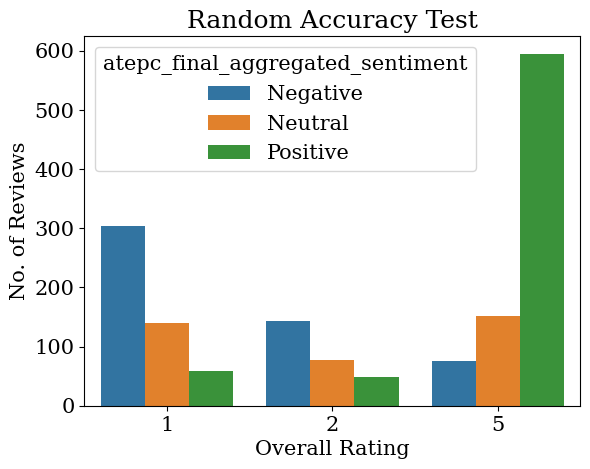

In [26]:
# Group by Category1 and Category2 and calculate counts
counts = merged_df_company_reviews_atepc.groupby(['Overall Rating', 'atepc_final_aggregated_sentiment']).size().reset_index(name='No. of Reviews')

# Plotting clustered bar chart
sns.barplot(data=counts, x='Overall Rating', y='No. of Reviews', hue='atepc_final_aggregated_sentiment')
plt.title('Random Accuracy Test')
plt.xlabel('Overall Rating')
plt.ylabel('No. of Reviews')
plt.show()

### Perform Random Accuracy Check for Vader too:

In [27]:
# Model definition
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Create model specifications with different lexicons
vader = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/decorators.py:69: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  signature = inspect.formatargspec(regargs, varargs, varkwargs, defaults,
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [28]:
# Generate classification functions
# Baseline VADER

def sentiment_vader(sentence):

    sentiment_dict = vader.polarity_scores(sentence)

    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] > 0.05 :
        overall_sentiment = 'Positive'

    elif sentiment_dict['compound'] < -0.05 :
        overall_sentiment = 'Negative'

    else :
        overall_sentiment = 'Neutral'

    return overall_sentiment

In [29]:
# apply classification function
start_time = time.time()
merged_df_company_reviews_atepc['vader_sentiment'] = np.vectorize(sentiment_vader)(merged_df_company_reviews_atepc['Overall Review with Title'])
end_time = time.time()

print("Time take for classification using vader is", str(end_time-start_time))

Time take for classification using vader is 1.4848380088806152


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

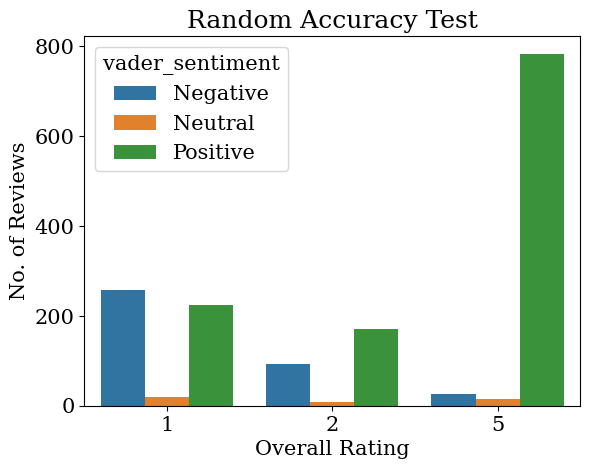

In [30]:
# Group by Category1 and Category2 and calculate counts
vader_counts = merged_df_company_reviews_atepc.groupby(['Overall Rating', 'vader_sentiment']).size().reset_index(name='No. of Reviews')

# Plotting clustered bar chart
sns.barplot(data=vader_counts, x='Overall Rating', y='No. of Reviews', hue='vader_sentiment')
plt.title('Random Accuracy Test')
plt.xlabel('Overall Rating')
plt.ylabel('No. of Reviews')
plt.show()

In [31]:
merged_df_company_reviews_atepc.iloc[0]

Company Name                                                               ServiceNow
Overall Rating                                                                      5
Review Date                                                                 31/1/2024
Review Title                                       best company i have ever worked at
Job Title                                                advisory solution consultant
Job Details                                         current employee more than 1 year
Location                                                               Washington, DC
Pros                                work life balance incredible growth customer c...
Cons                                not necessarily a con but employees are highly...
Overall Review                      work life balance incredible growth customer c...
Overall Review with Title           best company i have ever worked at // work lif...
Sentiment                                             

In [32]:
merged_df_company_reviews_atepc.to_csv('eval_results_distilbert_finetuned_atepc_vader.csv', index=False,header=True)

### Size of Evaluation Data

In [33]:
merged_df_company_reviews_atepc['Sentiment'].value_counts()

Sentiment
Positive    822
Negative    774
Name: count, dtype: int64

In [34]:
merged_df_company_reviews_atepc

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,...,aspect,position,sentiment,probs,confidence,negative_score,positive_score,neutral_score,atepc_final_aggregated_sentiment,vader_sentiment
0,ServiceNow,5,31/1/2024,best company i have ever worked at,advisory solution consultant,current employee more than 1 year,"Washington, DC",work life balance incredible growth customer c...,not necessarily a con but employees are highly...,work life balance incredible growth customer c...,...,"[customer, employees]","[[14], [28]]","[Positive, Neutral]","[[0.000506317592225, 0.010489612817764001, 0.9...","[0.989, 0.8229000000000001]",0.000000,0.989004,0.822918,Positive,Positive
1,IBM,5,2/10/2023,fantastic place to work even after all these y...,business manager,current employee more than 3 years,Calcutta,ibm provides unmatched learning opportunity in...,well no it does not give you > 10 hike year on...,ibm provides unmatched learning opportunity in...,...,"[inhouse learning, culture, pay structure, man...","[[23, 24], [38], [84, 85], [159], [166]]","[Positive, Positive, Positive, Neutral, Neutral]","[[0.000377893651602, 0.000544077833183, 0.9990...","[0.9991000000000001, 0.9984000000000001, 0.929...",0.000000,2.927068,1.692079,Positive,Positive
2,Deliveroo,5,15/1/2024,great place to work,sales manager,former employee more than 1 year,"London, England",awesome products and teams to work with,really nothing i can think of,awesome products and teams to work with really...,...,[teams],[[9]],[Positive],"[[0.0006282532704060001, 0.000342606130288, 0....",[0.999],0.000000,0.999029,0.000000,Positive,Positive
3,Booking.com,5,5/9/2023,great culture people worklife balance and comp...,engineering manager,current employee less than 1 year,Amsterdam,the company gives a good compensation package ...,monthly healthcare insurance premium is not pa...,the company gives a good compensation package ...,...,"[culture, choice of breakfast, lunch, relocation]","[[1], [28, 29, 30], [32], [119]]","[Positive, Positive, Positive, Positive]","[[0.000649062916636, 0.0010858998866750001, 0....","[0.9983000000000001, 0.999, 0.9892000000000001...",0.000000,3.787633,0.000000,Positive,Positive
4,Hitachi,5,18/9/2023,employee,anonymous employee,current employee more than 5 years,"California, MD",amazing company to work with,no bad all good company,amazing company to work with no bad all good c...,...,[company],[[4]],[Positive],"[[0.00034612012677800004, 0.000440300529589, 0...",[0.9992000000000001],0.000000,0.999214,0.000000,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Keywords Studios,5,19/12/2022,best place to be,player support representative,current employee more than 5 years,"Manila, Dallas, AL",this might sound bias since im still in the co...,none that i could think of at the moment,this might sound bias since im still in the co...,...,"[place, employees safety]","[[1], [42, 43]]","[Positive, Positive]","[[0.0010562079260120001, 0.0003793321084230000...","[0.9986, 0.9994000000000001]",0.000000,1.997945,0.000000,Positive,Positive
1592,Palo Alto Networks,5,19/9/2023,great place,staff software engineer,current employee,"Santa Clara, CA",great wlb and interesting work,depending on the team culture can vary,great wlb and interesting work depending on th...,...,"[work, culture]","[[8], [13]]","[Positive, Neutral]","[[0.00021661433856900002, 0.000675417017191, 0...","[0.9991000000000001, 0.9985]",0.000000,0.999108,0.998526,Positive,Positive
1593,Rohde & Schwarz,5,1/4/2021,great place to work,manager mobile network test,current employee more than 3 years,"Dallas, TX",great place to work great culture and benefits,no downsides to working at rs,great place to work great culture and benefits...,...,"[place, culture]","[[1], [11]]","[Positive, Positive]","[[0.0009278626530430001, 0.000404849211918, 0....","[0.9987, 0.9995]",0.000000,1.998148,0.000000,Positiv

### Provide evaluation metrics such as precision, recall, and F-measure on such dataset

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [36]:
# Create a new column based on conditions
merged_df_company_reviews_atepc['BERT_sentiment'] = merged_df_company_reviews_atepc['Predicted_Labels'].apply(lambda x: 'Negative' if x == 0 else 'Positive')

merged_df_company_reviews_atepc

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review,...,position,sentiment,probs,confidence,negative_score,positive_score,neutral_score,atepc_final_aggregated_sentiment,vader_sentiment,BERT_sentiment
0,ServiceNow,5,31/1/2024,best company i have ever worked at,advisory solution consultant,current employee more than 1 year,"Washington, DC",work life balance incredible growth customer c...,not necessarily a con but employees are highly...,work life balance incredible growth customer c...,...,"[[14], [28]]","[Positive, Neutral]","[[0.000506317592225, 0.010489612817764001, 0.9...","[0.989, 0.8229000000000001]",0.000000,0.989004,0.822918,Positive,Positive,Positive
1,IBM,5,2/10/2023,fantastic place to work even after all these y...,business manager,current employee more than 3 years,Calcutta,ibm provides unmatched learning opportunity in...,well no it does not give you > 10 hike year on...,ibm provides unmatched learning opportunity in...,...,"[[23, 24], [38], [84, 85], [159], [166]]","[Positive, Positive, Positive, Neutral, Neutral]","[[0.000377893651602, 0.000544077833183, 0.9990...","[0.9991000000000001, 0.9984000000000001, 0.929...",0.000000,2.927068,1.692079,Positive,Positive,Negative
2,Deliveroo,5,15/1/2024,great place to work,sales manager,former employee more than 1 year,"London, England",awesome products and teams to work with,really nothing i can think of,awesome products and teams to work with really...,...,[[9]],[Positive],"[[0.0006282532704060001, 0.000342606130288, 0....",[0.999],0.000000,0.999029,0.000000,Positive,Positive,Positive
3,Booking.com,5,5/9/2023,great culture people worklife balance and comp...,engineering manager,current employee less than 1 year,Amsterdam,the company gives a good compensation package ...,monthly healthcare insurance premium is not pa...,the company gives a good compensation package ...,...,"[[1], [28, 29, 30], [32], [119]]","[Positive, Positive, Positive, Positive]","[[0.000649062916636, 0.0010858998866750001, 0....","[0.9983000000000001, 0.999, 0.9892000000000001...",0.000000,3.787633,0.000000,Positive,Positive,Positive
4,Hitachi,5,18/9/2023,employee,anonymous employee,current employee more than 5 years,"California, MD",amazing company to work with,no bad all good company,amazing company to work with no bad all good c...,...,[[4]],[Positive],"[[0.00034612012677800004, 0.000440300529589, 0...",[0.9992000000000001],0.000000,0.999214,0.000000,Positive,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Keywords Studios,5,19/12/2022,best place to be,player support representative,current employee more than 5 years,"Manila, Dallas, AL",this might sound bias since im still in the co...,none that i could think of at the moment,this might sound bias since im still in the co...,...,"[[1], [42, 43]]","[Positive, Positive]","[[0.0010562079260120001, 0.0003793321084230000...","[0.9986, 0.9994000000000001]",0.000000,1.997945,0.000000,Positive,Positive,Negative
1592,Palo Alto Networks,5,19/9/2023,great place,staff software engineer,current employee,"Santa Clara, CA",great wlb and interesting work,depending on the team culture can vary,great wlb and interesting work depending on th...,...,"[[8], [13]]","[Positive, Neutral]","[[0.00021661433856900002, 0.000675417017191, 0...","[0.9991000000000001, 0.9985]",0.000000,0.999108,0.998526,Positive,Positive,Positive
1593,Rohde & Schwarz,5,1/4/2021,great place to work,manager mobile network test,current employee more than 3 years,"Dallas, TX",great place to work great culture and benefits,no downsides to working at rs,great place to work great culture and benefits...,...,"[[1], [11]]","[Positive, Positive]","[[0.0009278626530430001, 0.000404849211918, 0....","[0.9987, 0.9995]",0.000000,1.998148,0.000000,Positive,Positive,Positive
1594,eBay,5,22/2/2024,good company to work with,customer service representative csr,former employee more than 1 year,"Ta


For BERT_sentiment :

Total Number of reviews predicted as neutral: 0
Number of reviews predicted as neutral but are actually Negative: 0
Number of reviews predicted as neutral but are actually Positive: 0
Left with 1596 reviews:
Number of actual Negative Reviews: 774
Number of actual Positive Reviews: 822
              precision    recall  f1-score   support

    Positive       0.94      0.88      0.91       774
    Negative       0.89      0.95      0.92       822

    accuracy                           0.91      1596
   macro avg       0.91      0.91      0.91      1596
weighted avg       0.91      0.91      0.91      1596

Accuracy: 0.9122807017543859
Precision: 0.8901601830663616
Recall: 0.9464720194647201
F1-score: 0.9174528301886793
Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/valida

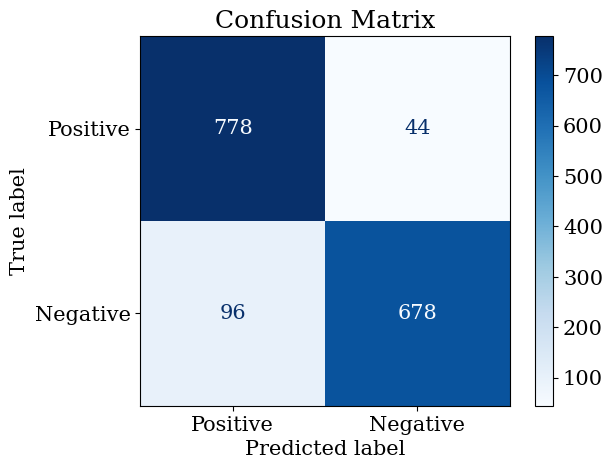


For atepc_final_aggregated_sentiment :

Total Number of reviews predicted as neutral: 369
Number of reviews predicted as neutral but are actually Negative: 218
Number of reviews predicted as neutral but are actually Positive: 151
Left with 1227 reviews:
Number of actual Negative Reviews: 556
Number of actual Positive Reviews: 671
              precision    recall  f1-score   support

    Positive       0.85      0.81      0.83       556
    Negative       0.85      0.89      0.87       671

    accuracy                           0.85      1227
   macro avg       0.85      0.85      0.85      1227
weighted avg       0.85      0.85      0.85      1227

Accuracy: 0.850040749796251
Precision: 0.8463726884779517
Recall: 0.886736214605067
F1-score: 0.86608442503639
Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/valida

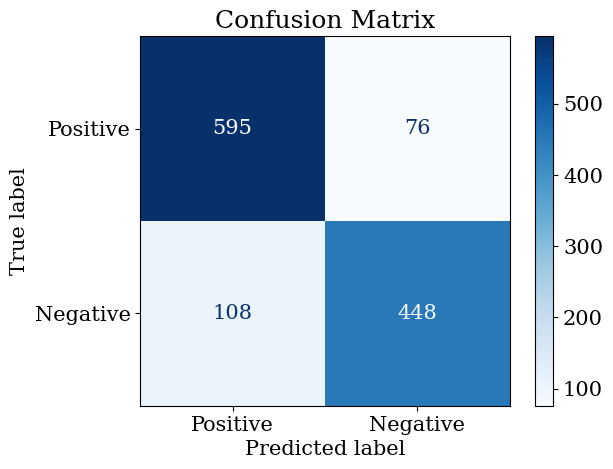


For vader_sentiment :

Total Number of reviews predicted as neutral: 42
Number of reviews predicted as neutral but are actually Negative: 28
Number of reviews predicted as neutral but are actually Positive: 14
Left with 1554 reviews:
Number of actual Negative Reviews: 746
Number of actual Positive Reviews: 808
              precision    recall  f1-score   support

    Positive       0.93      0.47      0.63       746
    Negative       0.66      0.97      0.79       808

    accuracy                           0.73      1554
   macro avg       0.80      0.72      0.71      1554
weighted avg       0.79      0.73      0.71      1554

Accuracy: 0.7297297297297297
Precision: 0.6646859083191851
Recall: 0.969059405940594
F1-score: 0.7885196374622356
Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/valida

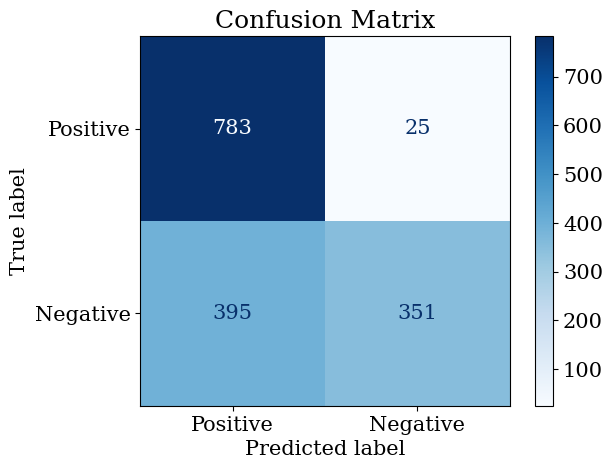

In [37]:

# Assuming y_true contains true labels and y_pred contains predicted labels
# Example:
# y_true = [0, 1, 1, 0, 1]
# y_pred = [0, 1, 0, 1, 1]


columns = ['BERT_sentiment','atepc_final_aggregated_sentiment','vader_sentiment']

for column in columns:
    
    print('\nFor',column,':\n')
    
    ###check how many of them predicted as neutral:
    
    neutral_predictions = merged_df_company_reviews_atepc[merged_df_company_reviews_atepc[column]=='Neutral']
    print("Total Number of reviews predicted as neutral:",len(neutral_predictions))
    print("Number of reviews predicted as neutral but are actually Negative:",len(neutral_predictions[neutral_predictions['Sentiment']=='Negative']))
    print("Number of reviews predicted as neutral but are actually Positive:",len(neutral_predictions[neutral_predictions['Sentiment']=='Positive']))
    
    positive_negative_predictions = merged_df_company_reviews_atepc[merged_df_company_reviews_atepc[column]!='Neutral']
    print("Left with",len(positive_negative_predictions),'reviews:')
    print("Number of actual Negative Reviews:",len(positive_negative_predictions[positive_negative_predictions['Sentiment']=='Negative']))
    print("Number of actual Positive Reviews:",len(positive_negative_predictions[positive_negative_predictions['Sentiment']=='Positive']))
          
          
    y_true = positive_negative_predictions['Sentiment']
    
    y_pred = positive_negative_predictions[column]

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred, pos_label='Positive')

    # Calculate recall
    recall = recall_score(y_true, y_pred, pos_label='Positive')

    # Calculate F1-score
    f1 = f1_score(y_true, y_pred, pos_label='Positive')
    
    # Define the labels
    labels = ['Positive','Negative']
    
    # Calculate and print the classification report
    print(classification_report(y_true, y_pred, target_names=labels))

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()


In [38]:
merged_df_company_reviews_atepc.to_csv('eval_results_distilbert_finetuned_atepc_vader.csv', index=False,header=True)